# Capstone II part 2 & 3 - EDA & Model prep

In [1]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import plot, plot_correlation, plot_missing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


NumExpr defaulting to 8 threads.


In [26]:
df = pd.read_csv("2019_natality_clean_data.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df.head(10)

Unnamed: 0  Birth_year  Birth_month  Birth_time  Day_of_week  M_age  \
0           1        2019            1        1305            3     40   
1           2        2019            1         800            3     30   
2           3        2019            1         130            4     25   
3           5        2019            1         738            4     30   
4           6        2019            1        2115            4     33   
5           7        2019            1        1044            4     26   
6           8        2019            1         819            5     33   
7           9        2019            1         841            5     24   
8          11        2019            1        1747            5     38   
9          12        2019            1        2047            6     33   

   M_nativity  M_residency  M_race Marital_status  ...  Delivery_type  \
0         2.0            1       4              1  ...              1   
1         1.0            1       3              1  ...              1   
2         1.0            1       1              1  ...              1   
3         1.0            1       4              2  ...              1   
4         1.0            2       1              1  ...              1   
5         2.0            1       2              1  ...              1   
6         1.0            1       1              1  ...              1   
7         1.0            1       6              1  ...              1   
8         1.0            1       1              1  ...              1   
9         1.0            1       7              1  ...              1   

   Spont_trial  Detailed_delivery_type  Attendant_type  M_transfer  \
0            X                       1               1           N   
1            X                       1               3           N   
2            X                       1               2           N   
3            X                       1               1           N   
4            X                       2               1           N   
5            X                       1               1           N   
6            X                       1               1           N   
7            X                       1               3           N   
8            X                       1               3           N   
9            X                       1               1           N   

   Pay_source Baby_sex  Gestation  OB_estimated_gest  Birth_weight  
0           1        F         39                 39          3715  
1           9        M         38                 38          3155  
2           2        M         38                 38          3600  
3           2        F         41                 41          2863  
4           1        M         39                 39          3695  
5           1        F         40                 40          3350  
6           1        F         44                 39          3700  
7           3        F         38                 38          3505  
8           2        F         39                 39          2890  
9           1        M         39                 39          3941  

[10 rows x 52 columns]

In [28]:
df.drop(['Unnamed: 0'],axis =1, inplace=True)

In [29]:
df.head()

Birth_year  Birth_month  Birth_time  Day_of_week  M_age  M_nativity  \
0        2019            1        1305            3     40         2.0   
1        2019            1         800            3     30         1.0   
2        2019            1         130            4     25         1.0   
3        2019            1         738            4     30         1.0   
4        2019            1        2115            4     33         1.0   

   M_residency  M_race Marital_status  M_educ  ...  Delivery_type  \
0            1       4              1       7  ...              1   
1            1       3              1       5  ...              1   
2            1       1              1       6  ...              1   
3            1       4              2       6  ...              1   
4            2       1              1       6  ...              1   

   Spont_trial  Detailed_delivery_type  Attendant_type  M_transfer Pay_source  \
0            X                       1               1           N          1   
1            X                       1               3           N          9   
2            X                       1               2           N          2   
3            X                       1               1           N          2   
4            X                       2               1           N          1   

   Baby_sex  Gestation  OB_estimated_gest  Birth_weight  
0         F         39                 39          3715  
1         M         38                 38          3155  
2         M         38                 38          3600  
3         F         41                 41          2863  
4         M         39                 39          3695  

[5 rows x 51 columns]

In [30]:
# Change Uknown values 'U' with null

df.replace('U', np.nan, inplace=True)

In [31]:
df.isnull().sum()

Birth_year                    0
Birth_month                   0
Birth_time                    0
Day_of_week                   0
M_age                         0
M_nativity                    0
M_residency                   0
M_race                        0
Marital_status                0
M_educ                        0
F_age                         0
F_race                        0
F_educ                        0
Pre_care_tri                  0
Prenatal_visits               0
WIC_client                33730
num_cig_b4_preg               0
M_height                      0
M_pre_weight                  0
M_del_weight                  0
weight_gain                   0
Pre_diabetese              1364
Gest_diabetese             1364
Pre_hypertension           1364
Gest_hypertension          1364
Eclempsia                  1364
Prev_premie                1364
Infertility_treat          1364
Fertility_drugs            4144
Reprod_tech                4144
Prev_c_sect                   0
No_risk_

In [32]:
# Change unknown birthweight to null
df.replace(9999, np.nan, inplace=True)

In [33]:
# Changing unknown 9 values with null
nine_to_null = ['Pay_source', 'Attendant_type', 'Detailed_delivery_type', 'Delivery_type', 'Fetal_pres', "No_infections", "No_risk_factors", "No_labor_complic", "M_educ", "F_educ", "F_race", "Prev_c_sect"]
for col in nine_to_null:
    df[col].replace(9, np.nan, inplace=True)

In [34]:
#Changing 999 values with null
df["M_pre_weight"].replace(999, np.nan, inplace=True)
df['M_del_weight'].replace(999, np.nan, inplace=True)


In [35]:
#Changing unknown 99 values to null
ninetynine_to_null = ['F_age', 'M_age', 'Prenatal_visits', 'Gestation', 'OB_estimated_gest', 'M_height']
for col in ninetynine_to_null:
    df[col].replace(99, np.nan, inplace=True)

In [36]:
# Changing unknown nativity to null
df['M_nativity'].replace(3, np.nan, inplace=True)

#Changing unknown marital status to null
df['Marital_status'].replace('a', np.nan, inplace=True)

#Changing unknown father's race to null
df['F_race'].replace(8, np.nan, inplace=True)

#Changing unknown Prenatal care trimester 5 to null
df['Pre_care_tri'].replace(5, np.nan, inplace=True)

#Changing unknown mother's race 8 to null
df['M_race'].replace(8, np.nan, inplace=True)

In [37]:
df.isnull().sum()

Birth_year                     0
Birth_month                    0
Birth_time                    51
Day_of_week                    0
M_age                          0
M_nativity                  5924
M_residency                    0
M_race                     28198
Marital_status            388274
M_educ                     43191
F_age                     348387
F_race                    414511
F_educ                    418253
Pre_care_tri               65846
Prenatal_visits            72354
WIC_client                 33730
num_cig_b4_preg                0
M_height                   15053
M_pre_weight               56882
M_del_weight               37710
weight_gain                    0
Pre_diabetese               1364
Gest_diabetese              1364
Pre_hypertension            1364
Gest_hypertension           1364
Eclempsia                   1364
Prev_premie                 1364
Infertility_treat           1364
Fertility_drugs             4144
Reprod_tech                 4144
Prev_c_sec


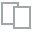
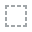
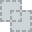
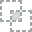
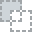
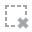
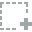
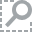
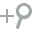
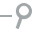
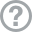
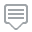
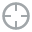
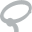
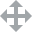
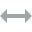
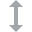
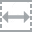
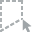
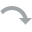
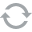
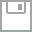
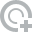
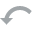
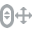
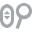
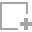
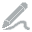
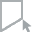
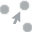
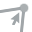
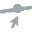

In [14]:
#Null values analysis
plot_missing(df)

<AxesSubplot:>

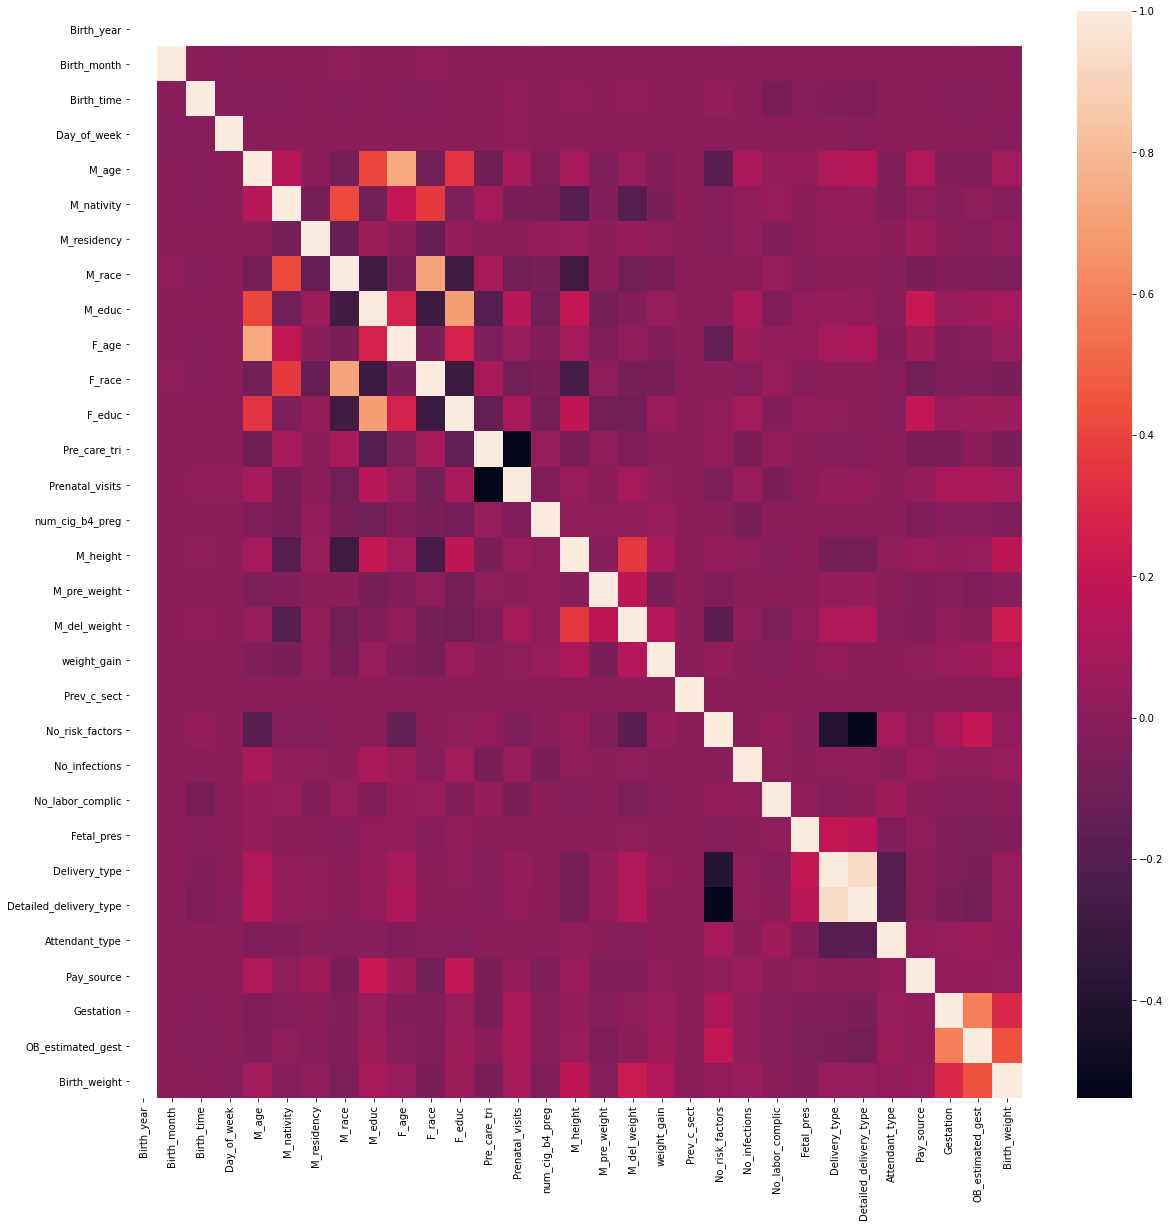

In [15]:
#Correlation heatmap
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), ax=ax)

In [ ]:
# Detailed delivery type categoriess: 1. Vaginal; 2. VBAC; 3. 1st c-section; 4. Repeat c-section; 
#5. Vaginal, unknown history; 6. C-section, unknown history

<AxesSubplot:xlabel='Detailed_delivery_type', ylabel='Birth_weight'>

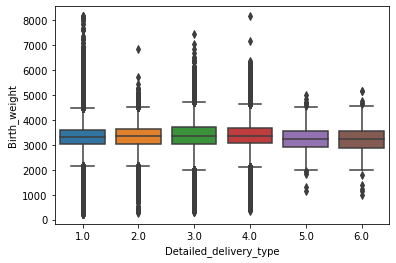

In [16]:
#Box plot of Detailed delivery type and baby'ss weight
sns.boxplot(x=df['Detailed_delivery_type'], y=df['Birth_weight'], data=df)

<AxesSubplot:xlabel='Detailed_delivery_type', ylabel='Prenatal_visits'>

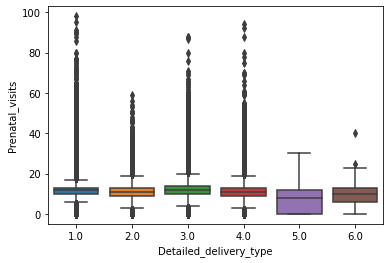

In [17]:
# Boxplot of detailed delivery type and number of Prenatal visits 
sns.boxplot(x=df['Detailed_delivery_type'], y=df['Prenatal_visits'], data=df)

<AxesSubplot:xlabel='Detailed_delivery_type', ylabel='Gestation'>

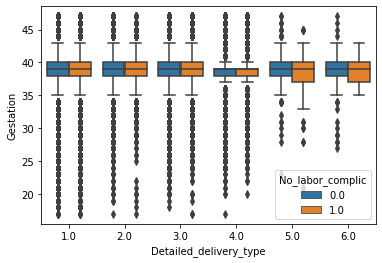

In [18]:
#Boxplot of detailed delivery ttype and gestation, by presence of labor complications
sns.boxplot(x=df['Detailed_delivery_type'], y=df['Gestation'], hue = df['No_labor_complic'], data=df)

<AxesSubplot:xlabel='Detailed_delivery_type', ylabel='M_height'>

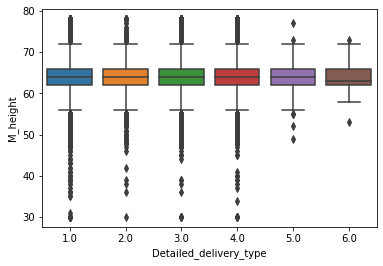

In [19]:
#Booxplot of detailed delivery type and mother's height
sns.boxplot(x=df['Detailed_delivery_type'], y=df['M_height'], data=df)

<AxesSubplot:xlabel='Day_of_week'>

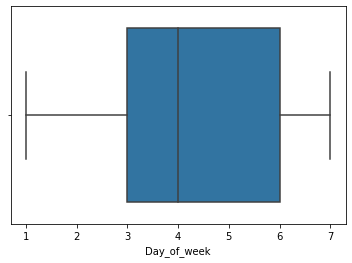

In [20]:
Boxplot of day of the week
sns.boxplot(x=df['Day_of_week'], data=df)

<AxesSubplot:xlabel='Delivery_type', ylabel='M_age'>

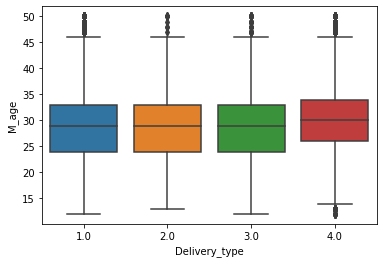

In [91]:
#Box plot of delivery type and mother's age (1-Vaginal, 2 - Forceps, 3-Vacuum, 4-C-section)
sns.boxplot(x=df['Delivery_type'], y=df['M_age'], data=df)

In [62]:
Xcat_variables = [ 'Birth_month', 'Day_of_week', 'M_nativity', 'M_residency', 'M_race', 'Marital_status', 'M_educ', 'F_race', 'F_educ', 'Pre_care_tri', 'WIC_client', 'Pre_diabetese', 'Gest_diabetese', 'Pre_hypertension', 'Gest_hypertension', 'Eclempsia', 'Prev_premie', 'Infertility_treat', 'Prev_c_sect', 'No_risk_factors', 'No_infections', 'Induction', 'Augment', 'Steroids', 'Antibiotics', 'Chorioam', 'Anesthesia', 'No_labor_complic', 'Fetal_pres', 'Spont_trial', 'Attendant_type', 'Pay_source',  'Baby_sex']
num_variables = ['Birth_weight', 'M_height', 'M_pre_weight', 'M_del_weight', 'weight_gain', 'M_age', 'F_age', 'Gestation', 'OB_estimated_gest'] 


In [74]:
Xcat = df[Xcat_variables]

In [75]:
Xcat.columns

Index(['Birth_month', 'Day_of_week', 'M_nativity', 'M_residency', 'M_race',
       'Marital_status', 'M_educ', 'F_race', 'F_educ', 'Pre_care_tri',
       'WIC_client', 'Pre_diabetese', 'Gest_diabetese', 'Pre_hypertension',
       'Gest_hypertension', 'Eclempsia', 'Prev_premie', 'Infertility_treat',
       'Prev_c_sect', 'No_risk_factors', 'No_infections', 'Induction',
       'Augment', 'Steroids', 'Antibiotics', 'Chorioam', 'Anesthesia',
       'No_labor_complic', 'Fetal_pres', 'Spont_trial', 'Attendant_type',
       'Pay_source', 'Baby_sex'],
      dtype='object')

In [76]:
Xcat = pd.get_dummies(Xcat)

In [77]:
Xcat.shape

(3146450, 53)

In [78]:
list(Xcat.columns)

['Birth_month',
 'Day_of_week',
 'M_nativity',
 'M_residency',
 'M_race',
 'M_educ',
 'F_race',
 'F_educ',
 'Pre_care_tri',
 'Prev_c_sect',
 'No_risk_factors',
 'No_infections',
 'No_labor_complic',
 'Fetal_pres',
 'Attendant_type',
 'Pay_source',
 'Marital_status_1',
 'Marital_status_2',
 'Marital_status_1',
 'Marital_status_2',
 'WIC_client_N',
 'WIC_client_Y',
 'Pre_diabetese_N',
 'Pre_diabetese_Y',
 'Gest_diabetese_N',
 'Gest_diabetese_Y',
 'Pre_hypertension_N',
 'Pre_hypertension_Y',
 'Gest_hypertension_N',
 'Gest_hypertension_Y',
 'Eclempsia_N',
 'Eclempsia_Y',
 'Prev_premie_N',
 'Prev_premie_Y',
 'Infertility_treat_N',
 'Infertility_treat_Y',
 'Induction_N',
 'Induction_Y',
 'Augment_N',
 'Augment_Y',
 'Steroids_N',
 'Steroids_Y',
 'Antibiotics_N',
 'Antibiotics_Y',
 'Chorioam_N',
 'Chorioam_Y',
 'Anesthesia_N',
 'Anesthesia_Y',
 'Spont_trial_N',
 'Spont_trial_X',
 'Spont_trial_Y',
 'Baby_sex_F',
 'Baby_sex_M']

In [79]:
Xnum = df[num_variables]

In [80]:
Xnum.shape

(3146450, 9)

In [81]:
Xnum.columns

Index(['Birth_weight', 'M_height', 'M_pre_weight', 'M_del_weight',
       'weight_gain', 'M_age', 'F_age', 'Gestation', 'OB_estimated_gest'],
      dtype='object')

In [82]:
X = pd.concat([Xcat, Xnum], axis=1)

In [83]:
X.shape

(3146450, 62)

In [84]:
list(X.columns)

['Birth_month',
 'Day_of_week',
 'M_nativity',
 'M_residency',
 'M_race',
 'M_educ',
 'F_race',
 'F_educ',
 'Pre_care_tri',
 'Prev_c_sect',
 'No_risk_factors',
 'No_infections',
 'No_labor_complic',
 'Fetal_pres',
 'Attendant_type',
 'Pay_source',
 'Marital_status_1',
 'Marital_status_2',
 'Marital_status_1',
 'Marital_status_2',
 'WIC_client_N',
 'WIC_client_Y',
 'Pre_diabetese_N',
 'Pre_diabetese_Y',
 'Gest_diabetese_N',
 'Gest_diabetese_Y',
 'Pre_hypertension_N',
 'Pre_hypertension_Y',
 'Gest_hypertension_N',
 'Gest_hypertension_Y',
 'Eclempsia_N',
 'Eclempsia_Y',
 'Prev_premie_N',
 'Prev_premie_Y',
 'Infertility_treat_N',
 'Infertility_treat_Y',
 'Induction_N',
 'Induction_Y',
 'Augment_N',
 'Augment_Y',
 'Steroids_N',
 'Steroids_Y',
 'Antibiotics_N',
 'Antibiotics_Y',
 'Chorioam_N',
 'Chorioam_Y',
 'Anesthesia_N',
 'Anesthesia_Y',
 'Spont_trial_N',
 'Spont_trial_X',
 'Spont_trial_Y',
 'Baby_sex_F',
 'Baby_sex_M',
 'Birth_weight',
 'M_height',
 'M_pre_weight',
 'M_del_weight',
 'we

In [85]:
X.head()

Birth_month  Day_of_week  M_nativity  M_residency  M_race  M_educ  F_race  \
0            1            3         2.0            1     4.0     7.0     1.0   
1            1            3         1.0            1     3.0     5.0     3.0   
2            1            4         1.0            1     1.0     6.0     1.0   
3            1            4         1.0            1     4.0     6.0     4.0   
4            1            4         1.0            2     1.0     6.0     1.0   

   F_educ  Pre_care_tri  Prev_c_sect  ...  Baby_sex_M  Birth_weight  M_height  \
0     6.0           1.0          0.0  ...           0        3715.0      66.0   
1     3.0           1.0          0.0  ...           1        3155.0      61.0   
2     6.0           1.0          0.0  ...           1        3600.0      64.0   
3     4.0           1.0          0.0  ...           0        2863.0      63.0   
4     6.0           1.0          0.0  ...           1        3695.0      62.0   

   M_pre_weight  M_del_weight  weight_gain  M_age  F_age  Gestation  \
0         150.0         204.0           54     40   39.0       39.0   
1         110.0         159.0           49     30   36.0       38.0   
2         135.0         154.0           19     25   26.0       38.0   
3         184.0         194.0           10     30   30.0       41.0   
4         122.0         158.0           36     33   41.0       39.0   

   OB_estimated_gest  
0               39.0  
1               38.0  
2               38.0  
3               41.0  
4               39.0  

[5 rows x 62 columns]

In [86]:
#Making sure there are no object data types before scaling
X.select_dtypes(include='object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[3146450 rows x 0 columns]

In [87]:
y = df['Delivery_type']

In [88]:
#Dividing the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [89]:
#Scaling the data
SS = preprocessing.StandardScaler()
scaled_X_train =  SS.fit_transform(X_train)
scaled_X_test = SS.transform(X_test)

In [93]:
#Finding out what % of births of mothers older than 45 & younger than 15, end up being c-sections (56.3% and 9.4%)
(df['M_age']>45).sum()

3981

In [95]:
(df['M_age']<15).sum()

1477

In [97]:
((df['M_age']>45) & (df['Delivery_type']==4)).sum()

2241

In [98]:
((df['M_age']<15) & (df['Delivery_type']==4)).sum()

212